In [6]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [7]:
# 设定移除节点比例
q = np.linspace(0, 0.9, 10)
print(q)

N = 100000
M = 5*N
m = 5

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [8]:
avk_er = np.zeros(10)
SLCC_er = np.zeros(10)

avk_ba = np.zeros(10)
SLCC_ba = np.zeros(10)

samples = 1 # 10个独立样本的统计平均值
for i in range(samples):
    G_er = nx.gnm_random_graph(N, M)
    avk0_er = 2*nx.number_of_edges(G_er)/nx.number_of_nodes(G_er)

    # 将加强度中心性值从小到大升序排序
    DC_plus_er = cal_DC_plus(G_er)
    sequence_er = dict(sorted(DC_plus_er.items(), key=lambda x: x[1], reverse=False))

    y1, y2 = cal_avk_S_LCC(G_er, sequence_er, N, q, avk0_er)
    avk_er += y1
    SLCC_er += y2


    G_ba = nx.barabasi_albert_graph(N, m)
    avk0_ba = 2*nx.number_of_edges(G_ba)/nx.number_of_nodes(G_ba)

    DC_plus_ba = cal_DC_plus(G_ba)
    sequence_ba = dict(sorted(DC_plus_ba.items(), key=lambda x: x[1], reverse=False))
    y11, y22 = cal_avk_S_LCC(G_ba, sequence_ba, N, q, avk0_ba)

    avk_ba += y11
    SLCC_ba += y22

In [9]:
font_size = 18
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)

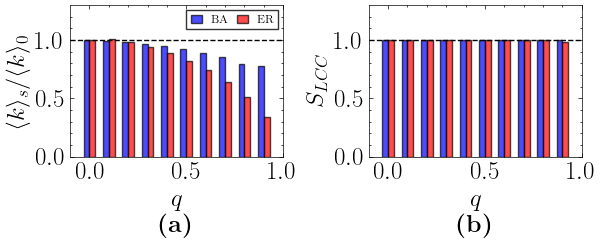

In [10]:
# 创建图形和子图
fig, axs = plt.subplots(1, 2, figsize=(6, 2.4), constrained_layout=True)

# 定义柱状图宽度
width = 0.03

# 左侧子图：平均度
ax = axs[0]
x_positions_ba = q - width/2  # BA模型柱子位置
x_positions_er = q + width/2  # ER模型柱子位置

ax.bar(x_positions_ba, avk_ba/samples, width=width, 
                color='blue', edgecolor='black', alpha=0.7, label="BA")
ax.bar(x_positions_er, avk_er/samples, width=width, 
                color='red', edgecolor='black', alpha=0.7, label="ER")
ax.plot(np.linspace(-0.1, 1.0, 1000), np.ones(1000), "k--", linewidth=1.0)

ax.set_xlim(-0.1, 1.00)
ax.set_xticks([0.00, 0.50, 1.00])
ax.set_ylim(0.0, 1.3)
ax.set_yticks([0.00, 0.50, 1.00])
ax.set_xlabel("$q$", fontsize=font_size)
ax.set_ylabel(r"$\langle k \rangle_s / \langle k \rangle_0$", fontsize=font_size)
ax.set_title(r"\textbf{(a)}", loc='center', y=-0.55, fontsize=font_size)
ax.legend(loc=0, ncol=2, columnspacing=0.8, markerscale=0.3, handlelength=1.0, edgecolor="black", fontsize=8, frameon=True, fancybox=False)


# 右侧子图：最大连通分量
ax = axs[1]
ax.bar(x_positions_ba, SLCC_ba/samples, width=width, 
                     color='blue', edgecolor='black', alpha=0.7)
ax.bar(x_positions_er, SLCC_er/samples, width=width, 
                     color='red', edgecolor='black', alpha=0.7)
ax.plot(np.linspace(-0.1, 1.0, 1000), np.ones(1000), "k--", linewidth=1.0)

ax.set_xlim(-0.1, 1.0)
ax.set_xticks([0.00, 0.50, 1.0])
ax.set_ylim(0.0, 1.3)
ax.set_yticks([0.00, 0.50, 1.00])
ax.set_xlabel("$q$", fontsize=font_size)
ax.set_ylabel(r"$S_{LCC}$", fontsize=font_size)
ax.set_title(r"\textbf{(b)}", loc='center', y=-0.55, fontsize=font_size)

plt.savefig("Fig2_R1.pdf")
plt.show()